**ASSIGNMENT 1**

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename),encoding='utf-8')
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

Session  Year ISO-alpha3 Code  \
8476       75  2020             WSM   
8477       75  2020             YEM   
8478       75  2020             ZAF   
8479       75  2020             ZMB   
8480       75  2020             ZWE   

                                                 Speech  
8476  Mr. President,\nDistinguished delegates,\nLadi...  
8477  In the name of God the Merciful and the Compas...  
8478  President of the General Assembly, Secretary-G...  
8479  Your excellency Mr. Volkan Bozkir, President o...  
8480  Your Excellency, Ambassador Volkan Bozkir, Pre...

In [2]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=';', engine='python')

df_codes.head()

ï»¿Global Code Global Name  Region Code Region Name  Sub-region Code  \
0               1       World          2.0      Africa             15.0   
1               1       World          2.0      Africa             15.0   
2               1       World          2.0      Africa             15.0   
3               1       World          2.0      Africa             15.0   
4               1       World          2.0      Africa             15.0   

   Sub-region Name  Intermediate Region Code Intermediate Region Name  \
0  Northern Africa                       NaN                      NaN   
1  Northern Africa                       NaN                      NaN   
2  Northern Africa                       NaN                      NaN   
3  Northern Africa                       NaN                      NaN   
4  Northern Africa                       NaN                      NaN   

  Country or Area  M49 Code ISO-alpha2 Code ISO-alpha3 Code  \
0         Algeria        12              DZ             DZA   
1           Egypt       818              EG             EGY   
2           Libya       434              LY             LBY   
3         Morocco       504              MA             MAR   
4           Sudan       729              SD             SDN   

  Least Developed Countries (LDC) Land Locked Developing Countries (LLDC)  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                               x                                     NaN   

  Small Island Developing States (SIDS)  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [3]:
df_merged = df_speech.merge(df_codes, how='left', on='ISO-alpha3 Code')
df_merged = df_merged[["Country or Area", "Year","Region Name","Sub-region Name",'ISO-alpha3 Code',"Least Developed Countries (LDC)", "Session","Speech"]]

df_merged = df_merged.rename(columns={"Year":"year", "Country or Area": "Country name"})
df_merged.head()

Country name  year Region Name                  Sub-region Name  \
0      Albania  1970      Europe                  Southern Europe   
1    Argentina  1970    Americas  Latin America and the Caribbean   
2    Australia  1970     Oceania        Australia and New Zealand   
3      Austria  1970      Europe                   Western Europe   
4      Belgium  1970      Europe                   Western Europe   

  ISO-alpha3 Code Least Developed Countries (LDC)  Session  \
0             ALB                             NaN       25   
1             ARG                             NaN       25   
2             AUS                             NaN       25   
3             AUT                             NaN       25   
4             BEL                             NaN       25   

                                              Speech  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...

**Sentiment analysis > adapt to what we want to do**

In [4]:
happinessdataframe = pd.read_excel('DataForTable2.1.xls') 
happinessdataframe = happinessdataframe[["Country name", "year", "Life Ladder"]]
happinessdataframe.head()

Country name  year  Life Ladder
0  Afghanistan  2008     3.723590
1  Afghanistan  2009     4.401778
2  Afghanistan  2010     4.758381
3  Afghanistan  2011     3.831719
4  Afghanistan  2012     3.782938

In [5]:
##We merge on the value of the country name. So all the names must be exactly the same.
happinessdataframe.replace("Russia", "Russian Federation", inplace=True)
happinessdataframe.replace("United States", "United States of America", inplace=True)
happinessdataframe.replace("Bolivia", "Bolivia (Plurinational State of)", inplace=True)
happinessdataframe.replace("Iran", "Iran (Islamic Republic of)", inplace=True)
happinessdataframe.replace("Turkey", "Türkiye", inplace=True)
happinessdataframe.replace("Turkey", "Türkiye", inplace=True)
happinessdataframe.replace("Congo (Brazzaville)", "Congo", inplace=True)
happinessdataframe.replace("Congo (Kinshasa)", "Congo", inplace=True)
happinessdataframe.replace("South Korea", "Republic of Korea", inplace=True)
happinessdataframe.replace("Laos", "Lao People's Democratic Republic", inplace=True)

happinessdataframe.replace("Vietnam", "Viet Nam", inplace=True)
happinessdataframe.replace("United Kingdom", "United Kingdom of Great Britain and Northern Ireland", inplace=True)
happinessdataframe.replace("Ivory Coast", "Côte d’Ivoire", inplace=True)
happinessdataframe.replace("Moldova", "Republic of Moldova", inplace=True)
happinessdataframe.replace("Tanzania", "United Republic of Tanzania", inplace=True)
happinessdataframe.replace("Syria", "Syrian Arab Republic", inplace=True)

# A few countries are missing because there is no happiness data from them: Papua New Guinea & Democratic People's Republic of Korea

#c#Checking weather the adaptations were succesfull 
happinessdataframe[happinessdataframe["Country name"]=="Russia"]["Country name"]
happinessdataframe[happinessdataframe["Country name"]=="Vietnam"]["Country name"]
happinessdataframe[happinessdataframe["Country name"]=="Tanzania"]["Country name"]

Series([], Name: Country name, dtype: object)

In [6]:
#merge happiness report with merged data set

df_complete = pd.merge(happinessdataframe, df_merged, on =['year','Country name'])
df_complete = df_complete.set_index(['year', 'Country name'])
df_complete.head()


Life Ladder Region Name Sub-region Name ISO-alpha3 Code  \
year Country name                                                            
2008 Afghanistan      3.723590        Asia   Southern Asia             AFG   
2009 Afghanistan      4.401778        Asia   Southern Asia             AFG   
2010 Afghanistan      4.758381        Asia   Southern Asia             AFG   
2011 Afghanistan      3.831719        Asia   Southern Asia             AFG   
2012 Afghanistan      3.782938        Asia   Southern Asia             AFG   

                  Least Developed Countries (LDC)  Session  \
year Country name                                            
2008 Afghanistan                                x       63   
2009 Afghanistan                                x       64   
2010 Afghanistan                                x       65   
2011 Afghanistan                                x       66   
2012 Afghanistan                                x       67   

                                                              Speech  
year Country name                                                     
2008 Afghanistan   Since the last time we \ngathered here in this...  
2009 Afghanistan   First, I would like to \ncongratulate His Exce...  
2010 Afghanistan   I join previous \nspeakers in congratulating y...  
2011 Afghanistan   I am honoured to be \nhere to read the stateme...  
2012 Afghanistan   ﻿As we speak today, the world\nis being shaken...

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

polarity_score=[]
sentiment_pos=[]
sentiment_neg=[]

for fragment in df_complete["Speech"]:
    ss = sia.polarity_scores(fragment)
    polarity_score.append(ss)
    sentiment_pos.append(ss['pos'])
    sentiment_neg.append(ss['neg'])
    


In [9]:
print(polarity_score)

[{'neg': 0.131, 'neu': 0.667, 'pos': 0.202, 'compound': 0.9982}, {'neg': 0.083, 'neu': 0.752, 'pos': 0.165, 'compound': 0.9972}, {'neg': 0.131, 'neu': 0.649, 'pos': 0.219, 'compound': 0.9993}, {'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'compound': 0.9997}, {'neg': 0.101, 'neu': 0.72, 'pos': 0.178, 'compound': 0.9993}, {'neg': 0.058, 'neu': 0.756, 'pos': 0.186, 'compound': 0.9999}, {'neg': 0.086, 'neu': 0.715, 'pos': 0.198, 'compound': 0.9996}, {'neg': 0.115, 'neu': 0.692, 'pos': 0.193, 'compound': 0.9992}, {'neg': 0.113, 'neu': 0.688, 'pos': 0.199, 'compound': 0.9997}, {'neg': 0.12, 'neu': 0.731, 'pos': 0.149, 'compound': 0.9944}, {'neg': 0.077, 'neu': 0.751, 'pos': 0.172, 'compound': 0.9996}, {'neg': 0.095, 'neu': 0.696, 'pos': 0.209, 'compound': 0.9998}, {'neg': 0.069, 'neu': 0.689, 'pos': 0.243, 'compound': 0.9999}, {'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'compound': 0.9999}, {'neg': 0.033, 'neu': 0.696, 'pos': 0.271, 'compound': 1.0}, {'neg': 0.05, 'neu': 0.781, 'pos': 0.169, 'c

In [10]:
df_complete['polarity_score'] = polarity_score

df_complete['score_neg'] = sentiment_neg
df_complete['score_pos'] = sentiment_pos

the mean of positive score is:  0.1751    The standard deviation of positive score is:  0.03239848312856498


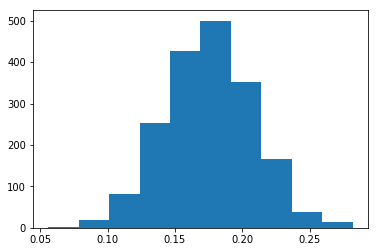

the mean of negative score is:  0.07879027027027027   the standard deviation of the negative score is:   0.0296081368165286


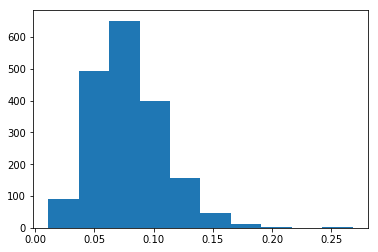

The mean of the total score isis:  1.0963097297297297
The standard deviation of the total score is:  0.04861957890752316


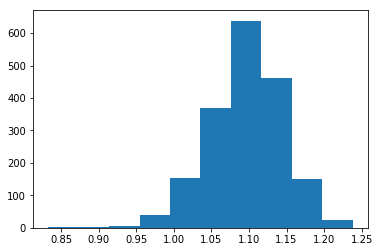

<bound method NDFrame.head of                    Life Ladder Region Name     Sub-region Name  \
year Country name                                                
2008 Afghanistan      3.723590        Asia       Southern Asia   
2009 Afghanistan      4.401778        Asia       Southern Asia   
2010 Afghanistan      4.758381        Asia       Southern Asia   
2011 Afghanistan      3.831719        Asia       Southern Asia   
2012 Afghanistan      3.782938        Asia       Southern Asia   
2013 Afghanistan      3.572100        Asia       Southern Asia   
2014 Afghanistan      3.130896        Asia       Southern Asia   
2015 Afghanistan      3.982855        Asia       Southern Asia   
2016 Afghanistan      4.220169        Asia       Southern Asia   
2017 Afghanistan      2.661718        Asia       Southern Asia   
2018 Afghanistan      2.694303        Asia       Southern Asia   
2019 Afghanistan      2.375092        Asia       Southern Asia   
2007 Albania          4.634252      Europe    

In [20]:
import statistics

print("the mean of positive score is: ",statistics.mean(df_complete['score_pos']), "   The standard deviation of positive score is: ", statistics.stdev(df_complete['score_pos']))

ax = plt.subplot()
ax.hist(df_complete['score_pos'])
plt.show()

print("the mean of negative score is: ",statistics.mean(df_complete['score_neg']), "  the standard deviation of the negative score is:  ",statistics.stdev(df_complete['score_neg']))

ax = plt.subplot()
ax.hist(df_complete['score_neg'])
plt.show()

s = df_complete['score_pos']-df_complete['score_neg']+1
print("The mean of the total score isis: ", statistics.mean(s))
print("The standard deviation of the total score is: ", statistics.stdev(s))
ax = plt.subplot()
ax.hist(s)
plt.show()

df_complete['score'] = s
df_complete.head



IndexError: index 48 is out of bounds for axis 0 with size 48

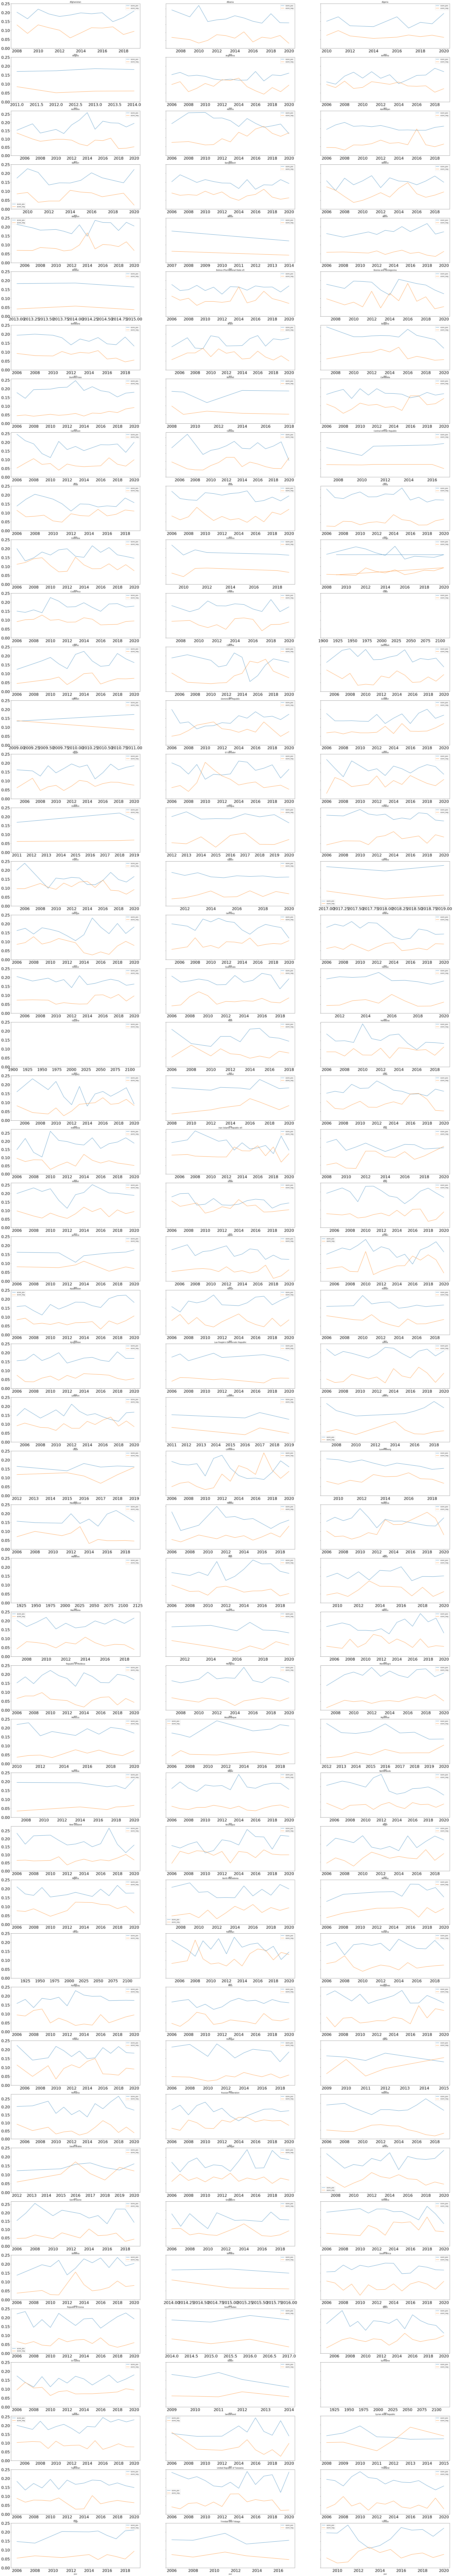

In [23]:
## NIET NODIG

data = df_complete.copy().reset_index()
data = data.set_index('year')
countries = data.loc[:,'Country name'].unique()

fig, axes = plt.subplots(nrows=48, ncols=3)

i = 0
j = 0

for country in countries:
    data[data['Country name'] == country].loc[:,['score_pos','score_neg']].plot(ax = axes[i,j], title = country, sharey = True, fontsize = 25, yticks = np.arange(0,0.30,0.05), figsize = (50, 300))
    if j < 2:
        j = j + 1
    else:
        j = 0
        i = i + 1

In [24]:
## NIET NODIG

data.iloc[300][::]

Country name                                                                  Canada
Life Ladder                                                                  7.41514
Region Name                                                                 Americas
Sub-region Name                                                     Northern America
ISO-alpha3 Code                                                                  CAN
Least Developed Countries (LDC)                                                  NaN
Session                                                                           67
Speech                             ﻿It is an\nhonour to address the opening of th...
polarity_score                     {'neg': 0.125, 'neu': 0.677, 'pos': 0.198, 'co...
score_neg                                                                      0.125
score_pos                                                                      0.198
score                                                            

In [ ]:
# import geopandas as gpd
# import pandas as pd
# import pyproj

# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) ##bestand met coordinaten
# data_graph = df_complete.copy().reset_index()
# datafinal = world.merge(data_graph, how="right", left_on=['iso_a3'], right_on=['ISO-alpha3 Code'])

# datafinal = datafinal[["name","year", "iso_a3", "gdp_md_est", "geometry","Life Ladder", "Region Name", "Speech", "polarity_score", "score_neg", "score_pos", "score"]]
# datafinal = datafinal.set_index(['name','year'])

# world[world['iso_a3']=="USA"] ##heeft hem wel
# df_complete[df_complete['ISO-alpha3 Code']=="USA"] ##heeft em niet
# datafinal[datafinal['iso_a3']=="USA"] ## heeft em dus ook niet meer



In [ ]:
# datafinal.plot("score", figsize=(20,20))

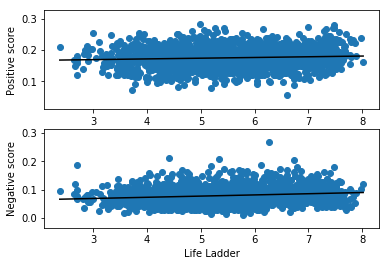

In [27]:
##NIET NODIG

##plotting all the countries on all the years for Life ladder to positive score

from sklearn.linear_model import LinearRegression

#takes the most important columns for this specific case and creates a linear regression

relation_table = data.loc[::,['Country name', 'Life Ladder', 'score_neg', 'score_pos']]

model = LinearRegression(fit_intercept=True)

#regression for positive speech score
x_as_score_pos = relation_table['Life Ladder'].values
y_as_score_pos = relation_table['score_pos'].values

model.fit(x_as_score_pos[:, np.newaxis], y_as_score_pos)

xfit_score_pos = np.linspace(min(x_as_score_pos), max(x_as_score_pos), 600) # 
yfit_score_pos = model.predict(xfit_score_pos[:, np.newaxis])

## now the regression for negative speach score
x_as_score_neg = relation_table['Life Ladder'].values
y_as_score_neg = relation_table['score_neg'].values

model.fit(x_as_score_neg[:, np.newaxis], y_as_score_neg)

xfit_score_neg = np.linspace(min(x_as_score_neg), max(x_as_score_neg), 600) # 
yfit_score_neg = model.predict(xfit_score_neg[:, np.newaxis])


fig, ax = plt.subplots(2)
ax[0].scatter(x_as_score_pos, y_as_score_pos)
ax[0].set_ylabel('Positive score')
ax[0].set_xlabel('Life Ladder')
ax[0].plot(xfit_score_pos, yfit_score_pos, c='black')

ax[1].scatter(x_as_score_neg, y_as_score_neg)
ax[1].set_ylabel('Negative score')
ax[1].set_xlabel('Life Ladder')
ax[1].plot(xfit_score_neg, yfit_score_neg, c='black')
plt.show()

In [30]:
## NIET NODIG

complete_data_2008['score_pos'].idxmax()
complete_data_2008['Life Ladder'].idxmax() ##found the outliers for year 2008

'Denmark'

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


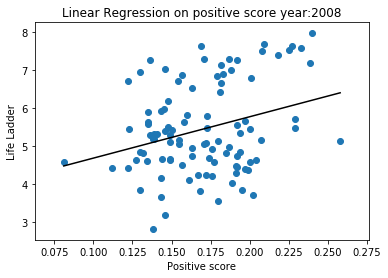

In [29]:
##NIET NODIG

complete_data_2008z = df_complete.loc[(2008,)]
complete_data_2008 = complete_data_2008z.drop('Sierra Leone') ## Sierra Leone is the outlier so we deleted this country


model = LinearRegression(fit_intercept=True)

#regression for positive speech score
y_as_score_pos = complete_data_2008['Life Ladder'].values
x_as_score_pos = complete_data_2008['score_pos'].values

model.fit(x_as_score_pos[:, np.newaxis], y_as_score_pos)

xfit_score_pos = np.linspace(min(x_as_score_pos), max(x_as_score_pos), 600) # 
yfit_score_pos = model.predict(xfit_score_pos[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_pos, y_as_score_pos)
ax.set_xlabel('Positive score')
ax.set_ylabel('Life Ladder')
ax.set_title("Linear Regression on positive score year:2008")
ax.plot(xfit_score_pos, yfit_score_pos, c='black')


In [31]:
##NIET NODIG
complete_data_2008['score_neg'].idxmax() ## Finding outlier to delete below

'Pakistan'

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


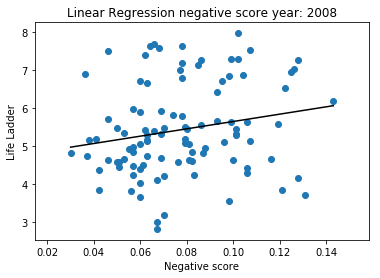

In [32]:
##NIET NODIG

complete_data_2008s = df_complete.loc[(2008,)]
complete_data_2008 = complete_data_2008s.drop('Pakistan') ## pakistan is the outlier so we deleted this country 

model = LinearRegression(fit_intercept=True)

#regression for positive speech score
y_as_score_neg = complete_data_2008['Life Ladder'].values
x_as_score_neg = complete_data_2008['score_neg'].values

model.fit(x_as_score_neg[:, np.newaxis], y_as_score_neg)

xfit_score_neg = np.linspace(min(x_as_score_neg), max(x_as_score_neg), 600) # 
yfit_score_neg = model.predict(xfit_score_neg[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_neg, y_as_score_neg)
ax.set_xlabel('Negative score')
ax.set_ylabel('Life Ladder')
ax.set_title("Linear Regression negative score year: 2008")
ax.plot(xfit_score_neg, yfit_score_neg, c='black')


In [33]:

df_complete.head()

Life Ladder Region Name Sub-region Name ISO-alpha3 Code  \
year Country name                                                            
2008 Afghanistan      3.723590        Asia   Southern Asia             AFG   
2009 Afghanistan      4.401778        Asia   Southern Asia             AFG   
2010 Afghanistan      4.758381        Asia   Southern Asia             AFG   
2011 Afghanistan      3.831719        Asia   Southern Asia             AFG   
2012 Afghanistan      3.782938        Asia   Southern Asia             AFG   

                  Least Developed Countries (LDC)  Session  \
year Country name                                            
2008 Afghanistan                                x       63   
2009 Afghanistan                                x       64   
2010 Afghanistan                                x       65   
2011 Afghanistan                                x       66   
2012 Afghanistan                                x       67   

                                                              Speech  \
year Country name                                                      
2008 Afghanistan   Since the last time we \ngathered here in this...   
2009 Afghanistan   First, I would like to \ncongratulate His Exce...   
2010 Afghanistan   I join previous \nspeakers in congratulating y...   
2011 Afghanistan   I am honoured to be \nhere to read the stateme...   
2012 Afghanistan   ﻿As we speak today, the world\nis being shaken...   

                                                      polarity_score  \
year Country name                                                      
2008 Afghanistan   {'neg': 0.131, 'neu': 0.667, 'pos': 0.202, 'co...   
2009 Afghanistan   {'neg': 0.083, 'neu': 0.752, 'pos': 0.165, 'co...   
2010 Afghanistan   {'neg': 0.131, 'neu': 0.649, 'pos': 0.219, 'co...   
2011 Afghanistan   {'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'co...   
2012 Afghanistan   {'neg': 0.101, 'neu': 0.72, 'pos': 0.178, 'com...   

                   score_neg  score_pos  score  
year Country name                               
2008 Afghanistan       0.131      0.202  1.071  
2009 Afghanistan       0.083      0.165  1.082  
2010 Afghanistan       0.131      0.219  1.088  
2011 Afghanistan       0.115      0.192  1.077  
2012 Afghanistan       0.101      0.178  1.077

In [60]:
complete_data_2007tot2013['Life Ladder'].idxmin()   ##finding the outlier to terminate this from the data 
                                                    ##doing this below (2013, 'Syrian Arab Republic')
                                                    ##this was the clear outlier in the scatterplot before termination

(2008, 'Togo')

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


R2-score:  -0.0012582912435734617
MSE:       1.2822642626815586


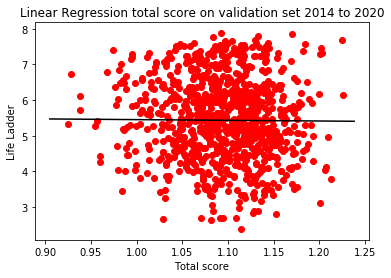

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
##LINEAR REGRESSION ON TOTAL SCORE
##trainingset from 2007 to 2013. validation set from 2014 to 2020

#training data
complete_data_2007tot2013 = df_complete.loc[([2007,2008,2009,2010,2011,2012,2013],)]

#finding the outlier: complete_data_2007tot2013['Life Ladder'].idxmin() == (2013, 'Syrian Arab Republic')
#this was the clear outlier in the scatterplot before termination
#as for all our outlier estimations, we first visualised the values and the outliers and then terminated that coordinate
complete_data_2007tot2013.drop((2013, 'Syrian Arab Republic'), axis=0, inplace=True)

model = LinearRegression(fit_intercept=True)

y_as_life_ladder = complete_data_2007tot2013['Life Ladder'].values
x_as_score_totaal = complete_data_2007tot2013['score'].values

model.fit(x_as_score_totaal[:, np.newaxis], y_as_life_ladder)


#test data
complete_data_2014tot2020 = df_complete.loc[([2014,2015,2016,2017,2018,2019,2020],)]

#finding the outliers: complete_data_2014tot2020['score'].idxmin() == (2017, 'Lithuania')
complete_data_2014tot2020.drop((2017, 'Lithuania'), axis=0, inplace=True)

#finding the outliers complete_data_2014tot2020['score'].idxmin() == (2015,'Czechia')
complete_data_2014tot2020.drop((2015, 'Czechia'), axis=0, inplace=True)


y_as_life_ladder_test = complete_data_2014tot2020['Life Ladder'].values
x_as_score_total_test = complete_data_2014tot2020['score'].values


xfit_score_totaal = np.linspace(min(x_as_score_totaal), max(x_as_score_totaal), 919) # 
yfit_score_totaal = model.predict(xfit_score_totaal[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_total_test, y_as_life_ladder_test, c='red')
ax.set_xlabel('Total score')
ax.set_ylabel('Life Ladder')
ax.set_title("Linear Regression total score on validation set 2014 to 2020")
ax.plot(xfit_score_totaal, yfit_score_totaal, c='black')

print("R2-score: ", r2_score(y_as_life_ladder_test, yfit_score_totaal))
print("MSE:      ", mean_squared_error(y_as_life_ladder_test, yfit_score_totaal))

##were training on 7 recent years to validate on the most recent 7 years.
##We want to use a validation set with the same size as training data



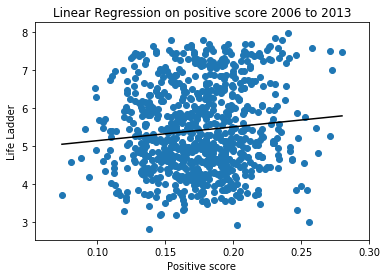

In [291]:
##NIET NODIG

complete_data_2006tot2013 = df_complete.loc[([2006,2007,2008,2009,2010,2011,2012,2013],)]
#complete_data_2008 = complete_data_2008z.drop('Sierra Leone') ## Sierra Leone is the outlier so we deleted this country


model = LinearRegression(fit_intercept=True)

#regression for positive speech score
y_as_score_pos = complete_data_2006tot2013['Life Ladder'].values
x_as_score_pos = complete_data_2006tot2013['score_pos'].values

model.fit(x_as_score_pos[:, np.newaxis], y_as_score_pos)

xfit_score_pos = np.linspace(min(x_as_score_pos), max(x_as_score_pos), 600) # 
yfit_score_pos = model.predict(xfit_score_pos[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_pos, y_as_score_pos)
ax.set_xlabel('Positive score')
ax.set_ylabel('Life Ladder')
ax.set_title("Linear Regression on positive score 2006 to 2013")
ax.plot(xfit_score_pos, yfit_score_pos, c='black')

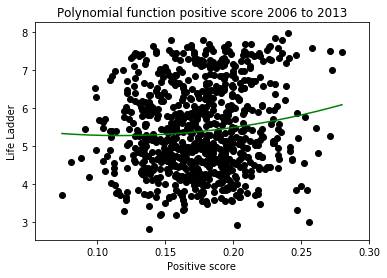

r2-score : -0.0739465238787218
MSE      :  1.3659524352705446


In [335]:
##NIET NODIG

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error


polymodel = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=True))
## we tested multiple degrees, and the degree=1 version is the best version given that it has the highest R2-score
## MSE is the interpretation depends on the scale of the y-variable, so in this case 1,4 is huge on a 3 to 8 scale
## The R2 score and MSE in this piece of code is not valid since it's not on a validation set. Therefore it is only
## a rough estimation. 


complete_data_2006tot2013 = df_complete.loc[([2006,2007,2008,2009,2010,2011,2012,2013],)]
#x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth","Life Ladder"]]

y_as_score_pos = complete_data_2006tot2013['Life Ladder'].values
x_as_score_pos = complete_data_2006tot2013['score_pos'].values


polymodel.fit(x_as_score_pos[:, np.newaxis], y_as_score_pos)


#5 Apply model
Xfit = np.linspace(min(x_as_score_pos), max(x_as_score_pos), 818)
Yfit = polymodel.predict(Xfit[:, np.newaxis])

#plot
fig, ax = plt.subplots()
ax.scatter(x_as_score_pos, y_as_score_pos, c='black')
ax.set_xlabel("Positive score")
ax.set_ylabel("Life Ladder")
ax.set_title("Polynomial function positive score 2006 to 2013")
ax.plot(Xfit, Yfit, c='green')
plt.show()


print("r2-score :", r2_score(y_as_score_pos, Yfit)) ## R2 score = below 0, why, how and what does this entail
print("MSE      : ",mean_squared_error(y_as_score_pos, Yfit))

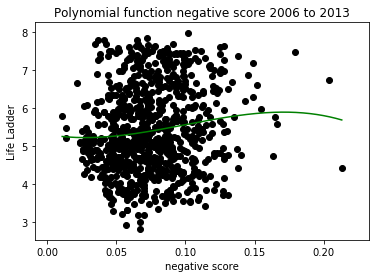

r2-score : -0.08098867764279927
MSE      :  1.3749093496696432


In [336]:
##NIET NODIG

polymodel = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept=True))
## we tested multiple degrees, and the degree=3 version is the best version given that it has the highest R2-score
## MSE is the interpretation depends on the scale of the y-variable, so in this case 1,4 is huge on a 3 to 8 scale
## The R2 score and MSE in this piece of code is not valid since it's not on a validation set. Therefore it is only
## a rough estimation. 


complete_data_2006tot2013 = df_complete.loc[([2006,2007,2008,2009,2010,2011,2012,2013],)]
#x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth","Life Ladder"]]

y_as_score_neg = complete_data_2006tot2013['Life Ladder'].values
x_as_score_neg = complete_data_2006tot2013['score_neg'].values


polymodel.fit(x_as_score_neg[:, np.newaxis], y_as_score_neg)


#5 Apply model
Xfit = np.linspace(min(x_as_score_neg), max(x_as_score_neg), 818)
Yfit = polymodel.predict(Xfit[:, np.newaxis])

#plot
fig, ax = plt.subplots()
ax.scatter(x_as_score_neg, y_as_score_neg, c='black')
ax.set_xlabel("negative score")
ax.set_ylabel("Life Ladder")
ax.set_title("Polynomial function negative score 2006 to 2013")
ax.plot(Xfit, Yfit, c='green')
plt.show()


print("r2-score :", r2_score(y_as_score_neg, Yfit)) ## R2 score = below 0, why, how and what does this entail
## and R2 score below 0 entails that the model is a worse predictor than a horizontal straight line on the mean of 
## of the y-axis would be. 
print("MSE      : ",mean_squared_error(y_as_score_neg, Yfit))

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


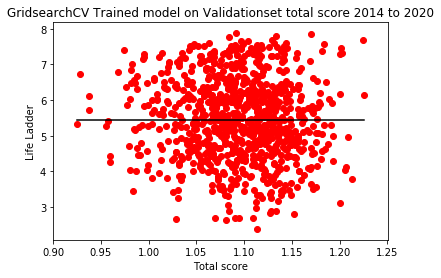

R2-score:  -0.002113778562697455
MSE:       1.2833598449364905

The optimal values for the given parameters are:  {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 0}


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
## I checked if there were any other features which could be implemented, but most only become usefull if we are dealing with
## multidimensional spaces. So it is not


#traindata

complete_data_2007tot2013 = df_complete.loc[([2007,2008,2009,2010,2011,2012,2013],)]

#finding the outlier: complete_data_2007tot2013['Life Ladder'].idxmin() == (2013, 'Syrian Arab Republic')
complete_data_2007tot2013.drop((2013, 'Syrian Arab Republic'), axis=0, inplace=True)

y_as_life_ladder_train = complete_data_2007tot2013['Life Ladder'].values
x_as_score_total_train = complete_data_2007tot2013['score'].values

modelForGrid = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(modelForGrid, param_grid, cv=10) #why 10, maybe change
grid.fit(x_as_score_total_train[:, np.newaxis], y_as_life_ladder_train);


#testdata

complete_data_2014tot2020 = df_complete.loc[([2014, 2015, 2016, 2017, 2018, 2019, 2020],)]

#finding the outliers: complete_data_2014tot2020['score'].idxmin() == (2017, 'Lithuania')
complete_data_2014tot2020.drop((2017, 'Lithuania'), axis=0, inplace=True)

#finding the outliers complete_data_2014tot2020['score'].idxmin() == (2015,'Czechia')
complete_data_2014tot2020.drop((2015, 'Czechia'), axis=0, inplace=True)

y_as_life_ladder_test = complete_data_2014tot2020['Life Ladder'].values
x_as_score_total_test = complete_data_2014tot2020['score'].values

xfitline = np.linspace(min(x_as_score_total_test), max(x_as_score_total_test),919)
yfitline = grid.best_estimator_.predict(xfitline[:, np.newaxis])

# #plot
fig, ax = plt.subplots()
ax.scatter(x_as_score_total_test, y_as_life_ladder_test, c='red')
ax.set_xlabel("Total score")
ax.set_ylabel("Life Ladder")
ax.set_title("GridsearchCV Trained model on Validationset total score 2014 to 2020")
ax.plot(xfitline, yfitline, c='black')
plt.show()


#resulting the best estimations for the parameters
#y_prediction_model = grid.best_estimator_.predict(x_as_score_neg_test[:, np.newaxis])
print("R2-score: ", r2_score(y_as_life_ladder_test, yfitline))
print("MSE:       ", mean_squared_error(y_as_life_ladder_test, yfitline))
print("")
print("The optimal values for the given parameters are: ", grid.best_params_)



In [95]:
complete_data_2014tot2020['score'].idxmin()

(2015, 'Czechia')

In [88]:
complete_data_2014tot2020['score'].idxmax()
#complete_data_2014tot2020[complete_data_2014tot2020['Country name'] == 'Malaysia']

(2019, 'Switzerland')

{'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 1}
R2-score:  -0.003881667673790723
MSE:       1.3057370194672717


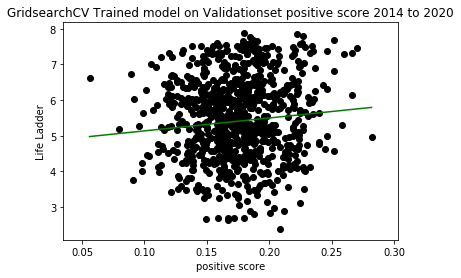

In [333]:
##NIET NODIG

# a shorter version used to train the gridmodel on the positive values

#LOOP NU EEN TIJD VAST OP DE POSITIEVE SCORE GRIDSEARCH MODEL.
#DEZE ONDERSTAANDE TOONT NAMELIJK NOG DE LIJN VAN DE NEGATIEVE SCORE VOLGENS MIJ


y_as_score_pos_train = complete_data_2006tot2013['Life Ladder'].values
x_as_score_pos_train = complete_data_2006tot2013['score_pos'].values

modelForGrid = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(modelForGrid, param_grid, cv=10) #why 10, maybe change
grid.fit(x_as_score_pos_train[:, np.newaxis], y_as_score_pos_train)

y_as_score_pos_test = complete_data_2014tot2020['Life Ladder'].values
x_as_score_pos_test = complete_data_2014tot2020['score_pos'].values

#resulting the best estimations for the parameters
print(grid.best_params_)
y_prediction_model = grid.best_estimator_.predict(x_as_score_pos_test[:, np.newaxis])
print("R2-score: ", r2_score(y_as_score_pos_test, y_prediction_model))
print("MSE:      ", mean_squared_error(y_as_score_pos_test, y_prediction_model))

xfitline = np.linspace(min(x_as_score_pos_test), max(x_as_score_pos_test),100)
yfitline = grid.best_estimator_.predict(xfitline[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_pos_test, y_as_score_pos_test, c='black')
ax.set_xlabel("positive score")
ax.set_ylabel("Life Ladder")
ax.set_title("GridsearchCV Trained model on Validationset positive score 2014 to 2020")
ax.plot(xfitline, yfitline, c='green')

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'coef_'